In [1]:
import numpy as np
import matplotlib.pyplot as mt
from scipy.linalg import eigh_tridiagonal
import time

#Funciones utilizadas------------------------------------

#Diagonalización matrices tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores

#Medición del tiempo para un cálculo
start_time = time.time() #Punto inicial
end_time = time.time() #Punto final
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

El tiempo de ejecución fue: 0.000067 segundos


Se muestra a continuación el código diseñado y construido enteramente por el propietario del repositorio, como los demás, con la máxima optimización posible para este problema. Es el resultado de una larga mejora progresiva hasta llegar a su versión final.

In [5]:
import matplotlib.pyplot as plt
def energ_estados(N, h, K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

def evolution_time(h0, hf,K0, Kf, eps0, eps1, t0, tf, p, N):
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c

    # Precalculos
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
    sz_matrix = np.tensordot(auto2.T, (Ms[:, None] * auto2), axes=([1], [0]))

    # Cálculo de S_z en función del tiempo
    energy_diff = energ2[:, None] - energ2[None, :]
    d_d_conj = np.outer(np.conjugate(d[:, 0]), d[:, 0])

    tp = np.linspace(t0, tf, p)
    S_zm = [
        np.sum(sz_matrix * np.exp(-1j * energy_diff * t) * d_d_conj).real / (N / 2)
        for t in tp
    ]

    plt.plot(tp, S_zm)
    plt.xlabel("t")
    plt.ylabel("M")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.show()


Comencemos estudiando un quench que atraviese la QPT de segundo orden del lado ferromagnético al paramagnético

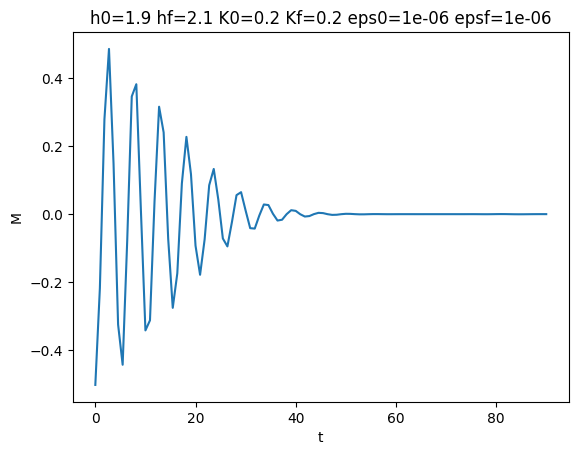

In [6]:
evolution_time(1.9, 2.1,0.2,0.2,1e-6, 1e-6, 0, 90, 100, 1000)

Como podemos ver, el sistema que parte de una magnetización no nula dada por el estado fundamental del Hamiltoniano inicial, comienza a oscilar en torno a M=0 hasta finalmente anularse en promedio. Todo esto como resultado de un hamiltoniano inicial con un único pozo centrado en cero. Veamos que ocurre al revés.

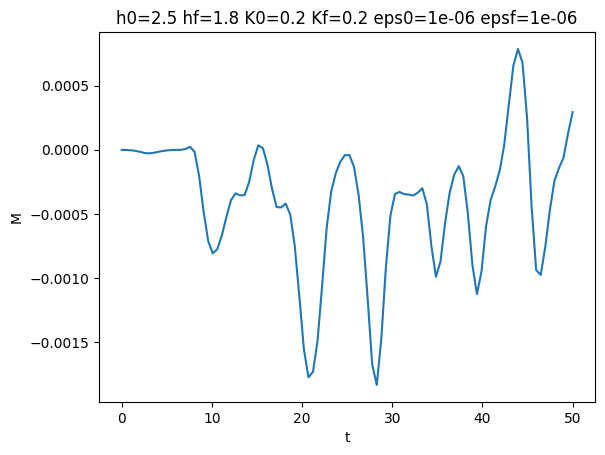

In [13]:
evolution_time(2.5, 1.8,0.2,0.2,1e-6, 1e-6, 0, 50, 100, 1500)

En este caso, el sistema continuaría siendo aproximadamente paramagnético en el tiempo

Estudiemos a continuación que ocurre donde se sitúa la transición de fase de primer orden para $K_{c}$, escogiendo h=2.5.

In [8]:
#Sacamos K_c con la fórmula de Mathematica
def K_c_R(h):
    return (27*h**2 - 36*h - 4 + np.sqrt( (9*h-2)**3 * (h-2))) / (64*h)
h=2.5
print(f"El valor crítico para h= {h} K_c es {K_c_R(h)}")

El valor crítico para h= 2.5 K_c es 0.8773876464605419


Representamos diferentes ejemplos:

Paramagnético a ferromagnético


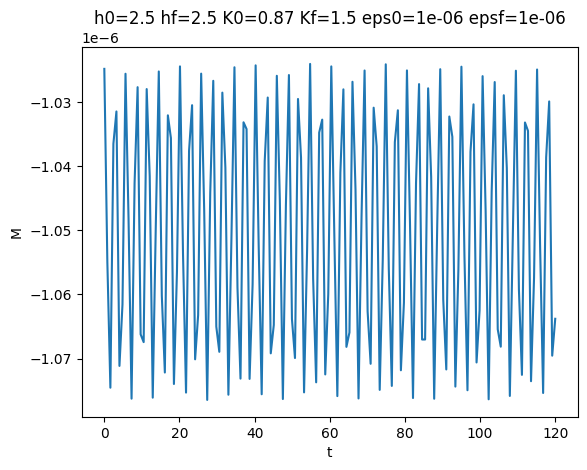

Ferromagnético a ferromagnético


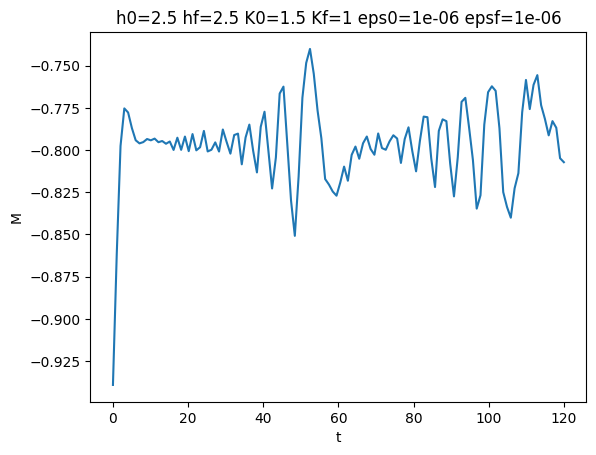

Ferromagnético a paramagnético


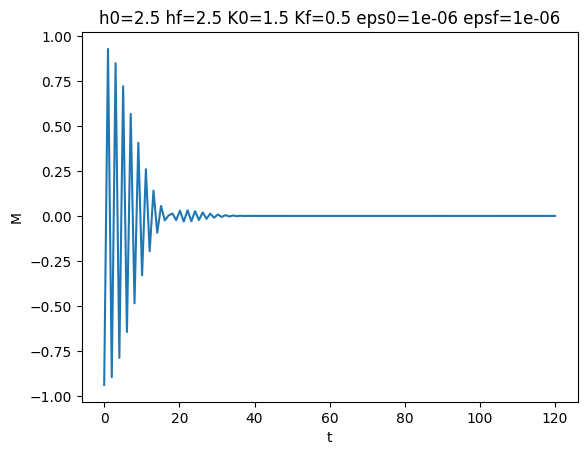

In [12]:
print("Paramagnético a ferromagnético")
evolution_time(2.5, 2.5,0.87,1.5,1e-6, 1e-6, 0, 120, 150, 1500)
print("Ferromagnético a ferromagnético")
evolution_time(2.5, 2.5,1.5,1,1e-6, 1e-6, 0, 120, 120, 1500)
print("Ferromagnético a paramagnético")
evolution_time(2.5, 2.5,1.5,0.5,1e-6, 1e-6, 0, 120, 120, 1500)

# Distribución de energía

Obtenemos las distribuciones energéticas y las de magnetización cambiando de base nuestro estado fundamental del hamiltoniano inicial al nuevo.

In [15]:
def energ_estados(N, h,K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

def distribucion_energias(N,h0,hf,K0,Kf,eps0,eps1):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
#Autovalores y autoestados en ambos hamiltonianos
    energ1, auto1 = energ_estados(N, h0,K0, eps0)
    energ2, auto2 = energ_estados(N, hf,Kf, eps1)

# Cambio de base
    U = auto2.T @ auto1

# Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c
    prob=np.abs(d)**2

#Magnetización
    magn=[]
    for i in range(int(N+1)):
        magn.append((auto2[:,i] @ (Ms*auto2[:,i]).T)*1/(N/2))
    plt.plot(energ2/N,prob,'.')
    plt.xlabel(r"$E_{n}$")
    plt.ylabel("Probability")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.grid()
    plt.show()
    print(f"La máxima probabilidad se da para E_n = {energ2[np.argmax(prob)]/N}")

    plt.plot(magn,prob,'.')
    plt.xlabel(r"$M$")
    plt.ylabel("Probability")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.grid()
    plt.show()
    print(f"La máxima probabilidad se da para M = {magn[np.argmax(prob)]}")
    return

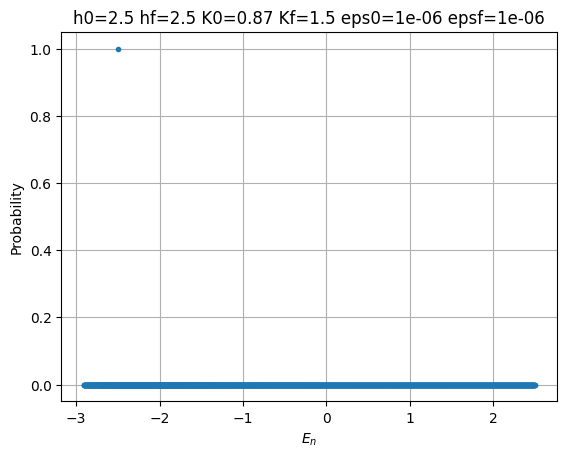

La máxima probabilidad se da para E_n = -2.5005561529579183


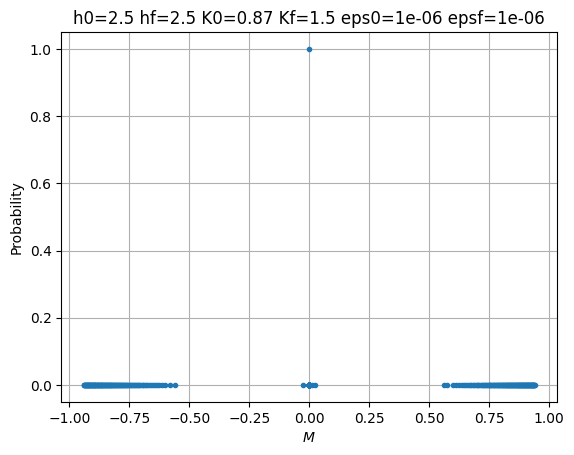

La máxima probabilidad se da para M = -1.0292584820226255e-06


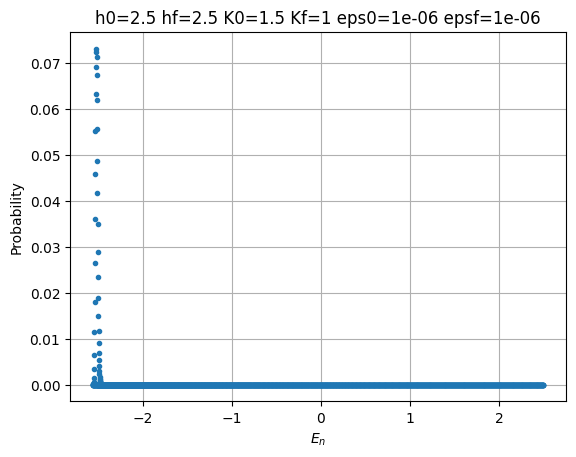

La máxima probabilidad se da para E_n = -2.5211145962535157


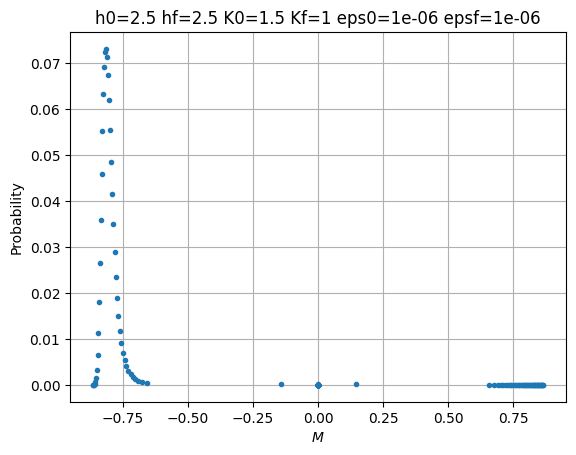

La máxima probabilidad se da para M = -0.8139149887164353


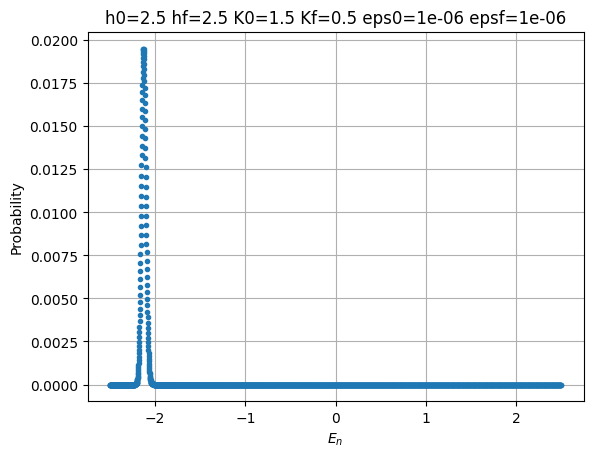

La máxima probabilidad se da para E_n = -2.130112032624877


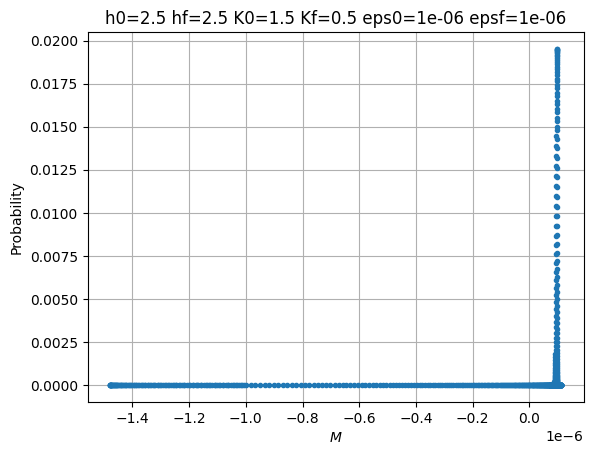

La máxima probabilidad se da para M = 9.640664773034034e-08


In [16]:
distribucion_energias(2500,2.5, 2.5,0.87,1.5,1e-6, 1e-6) #Paramagnético a ferromagnético
distribucion_energias(2500,2.5, 2.5,1.5,1,1e-6, 1e-6)#Ferromagnético a ferromagnético
distribucion_energias(2500,2.5, 2.5,1.5,0.5,1e-6, 1e-6)#Ferromagnético a Paramagnético